<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Four_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
!pip install yfinance;

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 27.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
from pandas_datareader.data import DataReader
import yfinance as yf

In [4]:
from datetime import datetime

In [5]:
stok_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in stok_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,AMAZON
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,AMAZON
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,AMAZON
2022-02-28,3048.500000,3089.000000,3017.000000,3071.260010,3071.260010,2878500,AMAZON
2022-03-01,3054.649902,3081.979980,2999.540039,3022.840088,3022.840088,2243700,AMAZON
2022-03-02,3016.979980,3059.989990,2975.000000,3041.050049,3041.050049,2366700,AMAZON
2022-03-03,3070.629883,3078.580078,2937.120117,2957.969971,2957.969971,3259900,AMAZON
2022-03-04,2943.179932,2957.000000,2876.139893,2912.820068,2912.820068,3046700,AMAZON
2022-03-07,2908.870117,2921.889893,2748.330078,2749.060059,2749.060059,4330800,AMAZON


In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,147.446733,149.033662,146.018149,147.591004,147.168866,8.791448e+07
std,17.121868,17.456899,16.751960,17.106078,17.292557,2.661306e+07
min,119.029999,120.400002,116.209999,116.360001,115.672493,4.100000e+07
25%,132.460003,134.097500,131.697502,133.110001,132.379723,6.904782e+07
50%,147.114998,148.610001,145.860001,146.934998,146.434448,8.360580e+07
75%,161.027496,164.109997,158.977493,161.312504,161.107243,1.019733e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-08 to 2022-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


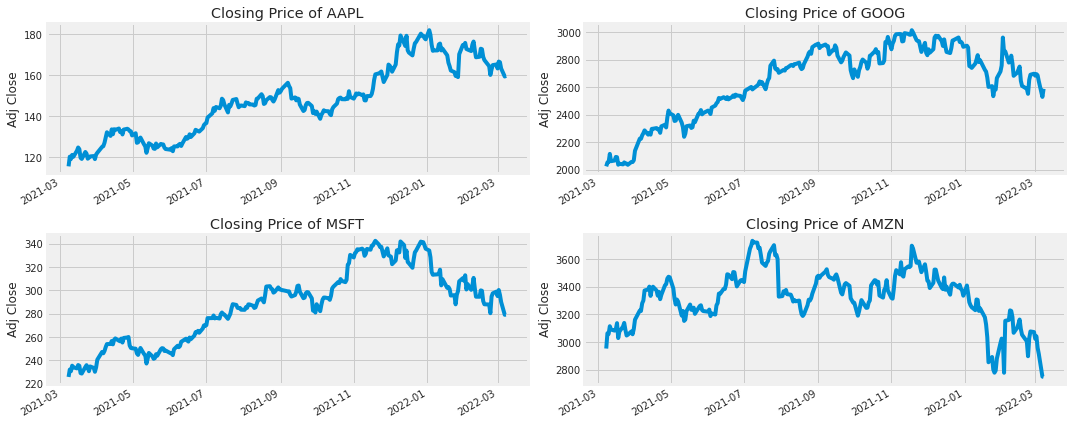

In [11]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stok_list[i - 1]}")
    plt.tight_layout()

Plot total volume of stocks treaded in a day

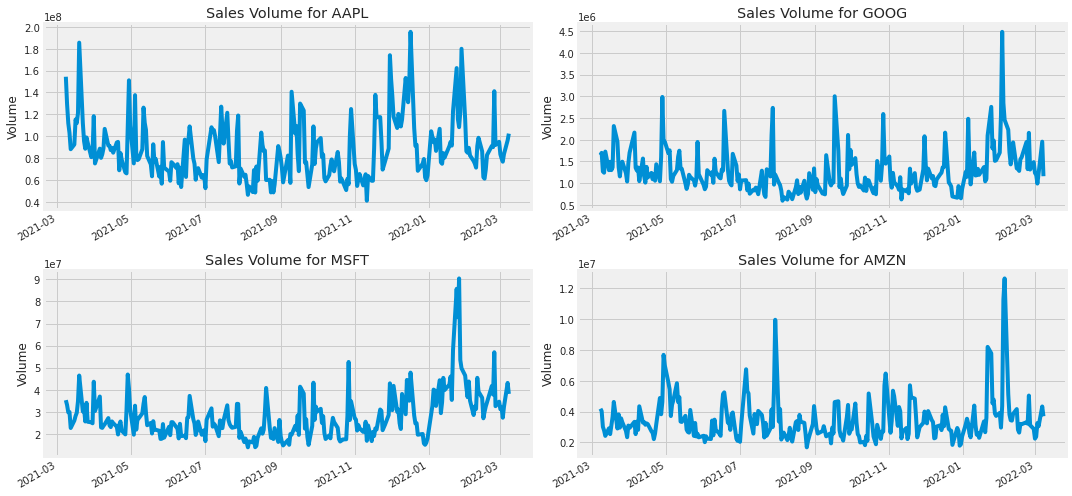

In [12]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stok_list[i - 1]}")
    
plt.tight_layout()

#Plot moving average of the various stocks

In [13]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

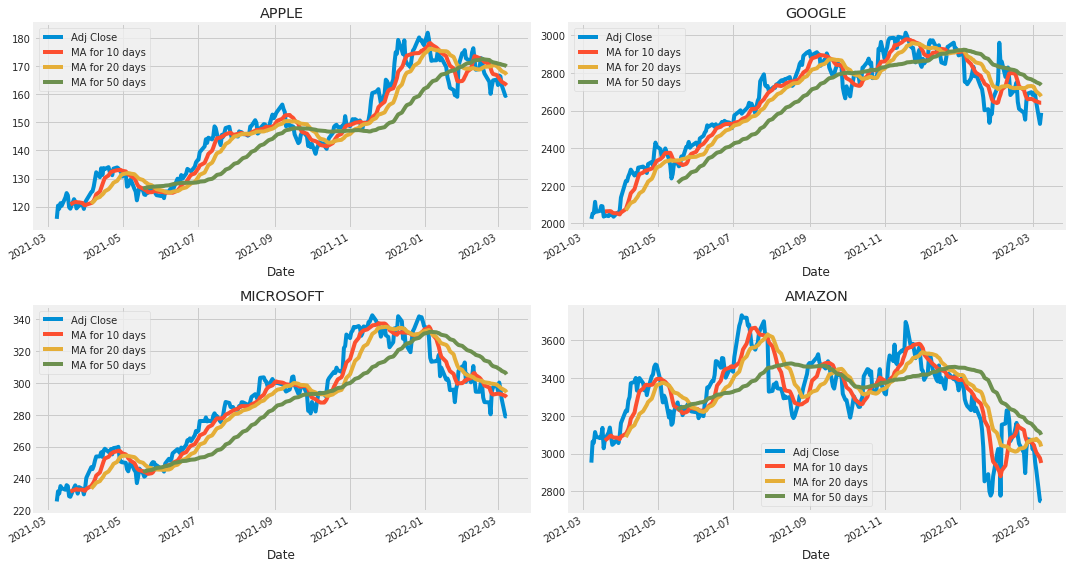

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()

What was the daily return of the stock on average?

In [15]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
  

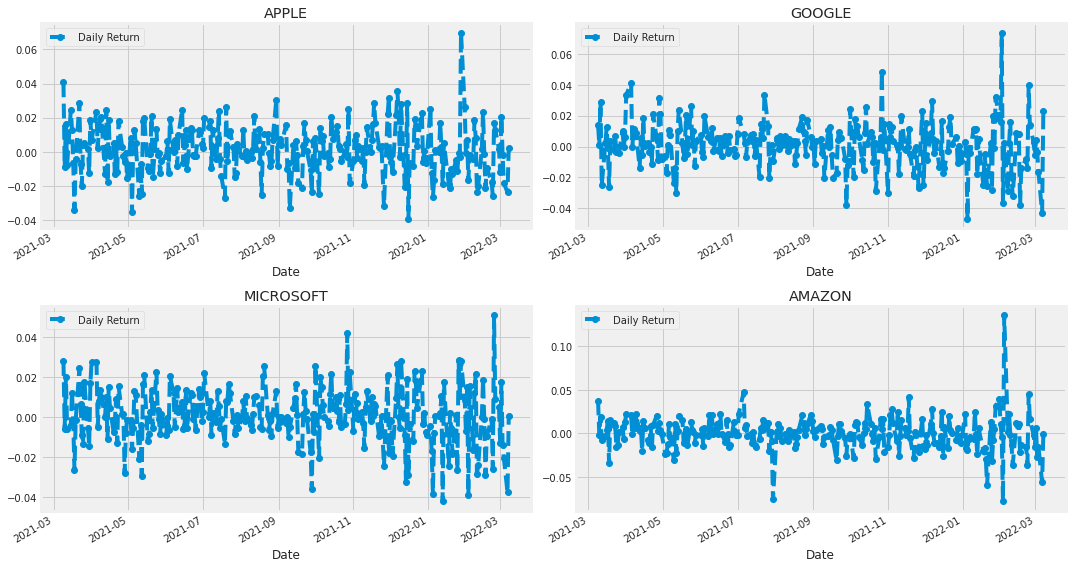

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

#Average daily return using histogram

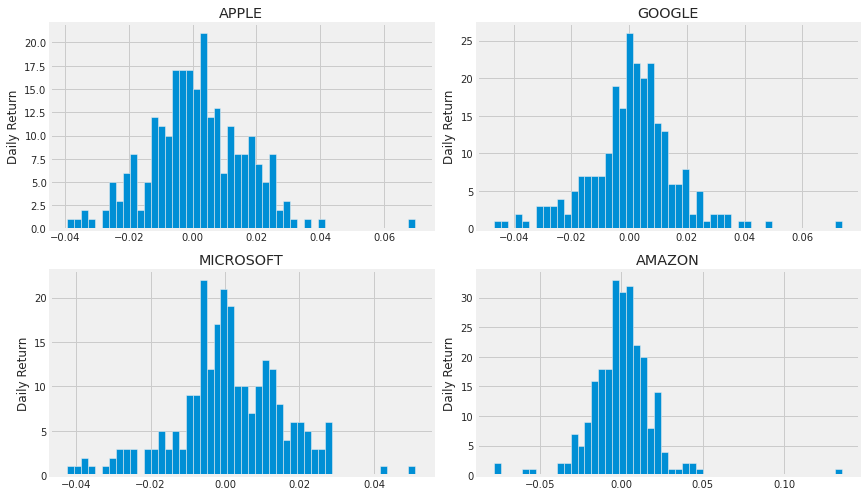

In [17]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#To get correlation between different stock price

In [18]:
closing_df = YahooDailyReader(stok_list, 'yahoo', start, end)['Adj Close']

NameError: ignored

In [19]:
import pandas
from pandas_datareader import data as pdr
yf.pdr_override()

In [20]:
closing_df = pdr.get_data_yahoo(stok_list, start, end)['Adj Close']
print(closing_df)

[*********************100%***********************]  4 of 4 completed
                  AAPL         AMZN         GOOG        MSFT
Date                                                        
2021-03-08  115.672493  2951.949951  2024.170044  225.552765
2021-03-09  120.374550  3062.850098  2052.699951  231.891144
2021-03-10  119.271118  3057.639893  2055.030029  230.542130
2021-03-11  121.239410  3113.590088  2114.770020  235.214066
2021-03-12  120.314903  3089.489990  2061.919922  233.845230
...                ...          ...          ...         ...
2022-03-02  166.559998  3041.050049  2695.030029  300.190002
2022-03-03  166.229996  2957.969971  2686.159912  295.920013
2022-03-04  163.169998  2912.820068  2642.439941  289.859985
2022-03-07  159.300003  2749.060059  2529.290039  278.910004
2022-03-08  159.587006  2746.822021  2587.560059  278.924988

[254 rows x 4 columns]


In [21]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-03-08,115.672493,2951.949951,2024.170044,225.552765
2021-03-09,120.374550,3062.850098,2052.699951,231.891144
2021-03-10,119.271118,3057.639893,2055.030029,230.542130
2021-03-11,121.239410,3113.590088,2114.770020,235.214066
2021-03-12,120.314903,3089.489990,2061.919922,233.845230


In [22]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-03-08,NaN,NaN,NaN,NaN
2021-03-09,0.040650,0.037568,0.014095,0.028102
2021-03-10,-0.009167,-0.001701,0.001135,-0.005817
2021-03-11,0.016503,0.018298,0.029070,0.020265
2021-03-12,-0.007625,-0.007740,-0.024991,-0.005820


In [23]:
#Comparing Google to itself should show a perfectly linear relationship

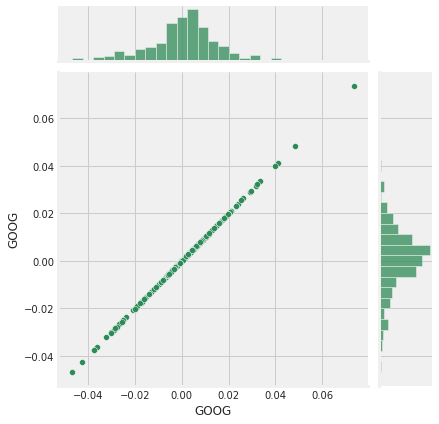

In [24]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

#Use joint plot to compare the daily returns of google and microsoft 

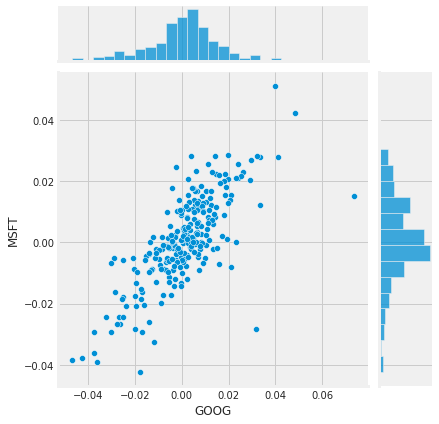

In [25]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

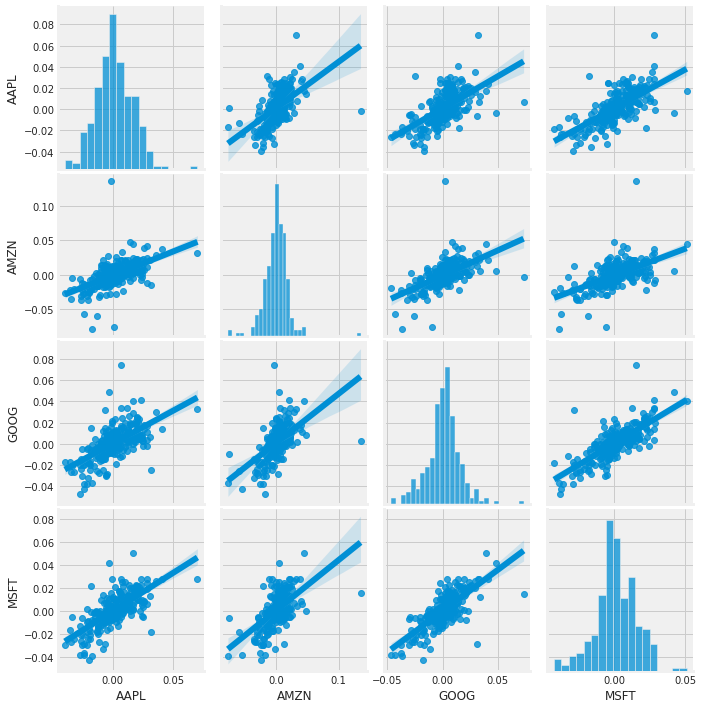

In [26]:
sns.pairplot(tech_rets, kind='reg')

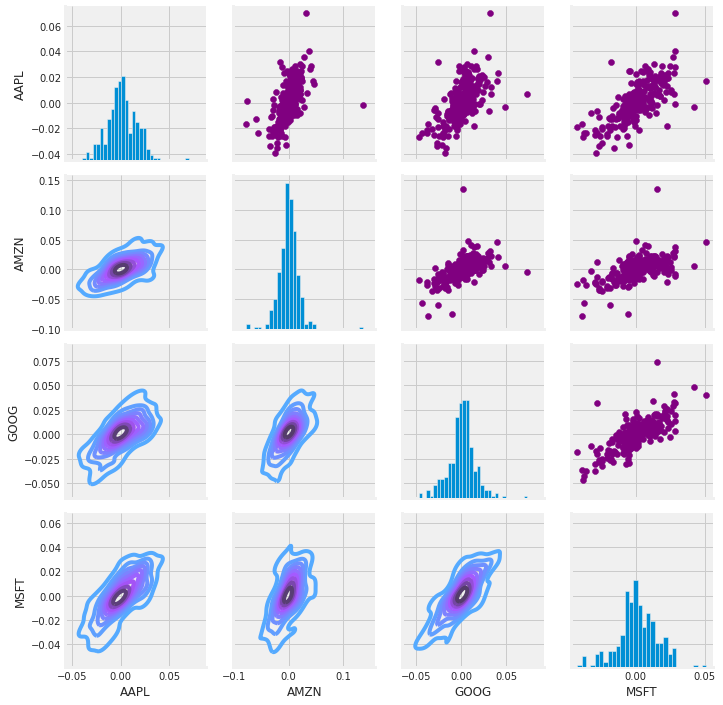

In [27]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

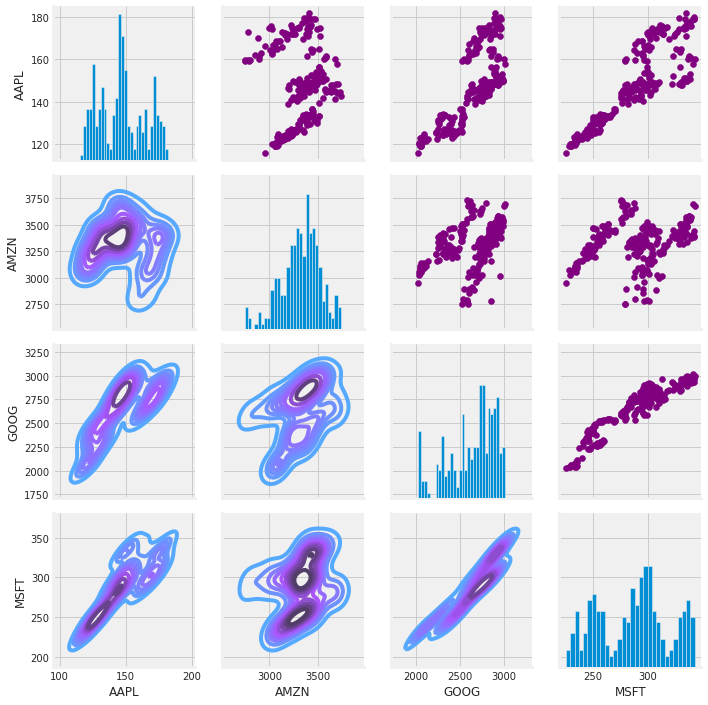

In [28]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

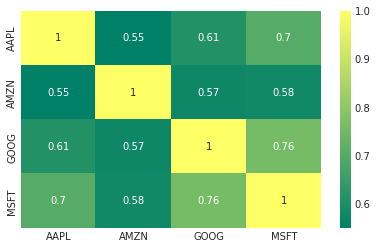

In [29]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

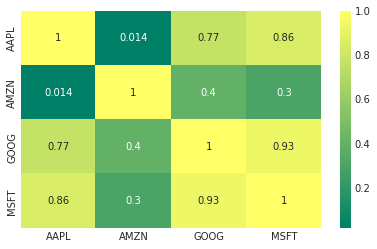

In [30]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

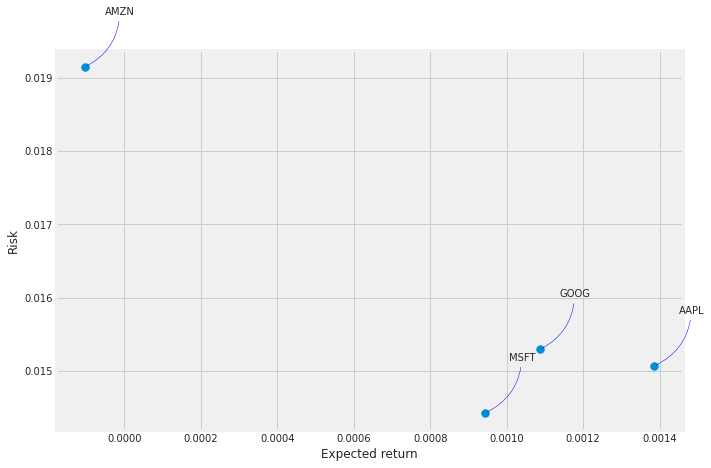

In [31]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#Predicting a closing price stock price of Apple

In [32]:
df = pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-08,120.930000,121.000000,116.209999,116.360001,115.672493,154376600
2021-03-09,119.029999,122.059998,118.790001,121.089996,120.374550,129525800
2021-03-10,121.690002,122.169998,119.449997,119.980003,119.271118,111943300
2021-03-11,122.540001,123.209999,121.260002,121.959999,121.239410,103026500
2021-03-12,120.400002,121.169998,119.160004,121.029999,120.314911,88105100


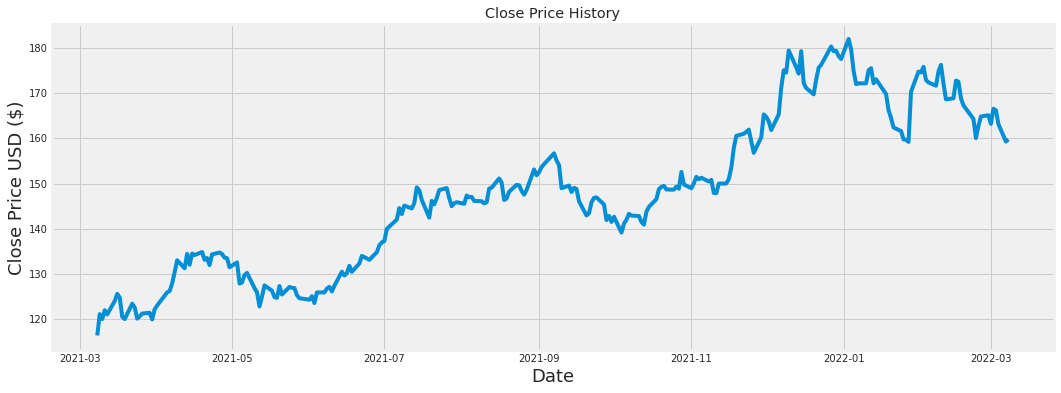

In [33]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

242

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.07204868],
       [0.05514095],
       [0.08530082],
       [0.07113478],
       [0.11622236],
       [0.14028941],
       [0.12795129],
       [0.06351864],
       [0.05529318],
       [0.10708301],
       [0.09413558],
       [0.05681639],
       [0.06443254],
       [0.0738766 ],
       [0.07661842],
       [0.05392233],
       [0.088195  ],
       [0.10114242],
       [0.1453161 ],
       [0.15003807],
       [0.17578069],
       [0.21325211],
       [0.25346536],
       [0.22665661],
       [0.27524743],
       [0.23869002],
       [0.2763138 ],
       [0.27113488],
       [0.28149273],
       [0.25514092],
       [0.26108151],
       [0.23731917],
       [0.2735721 ],
       [0.27966492],
       [0.27463824],
       [0.26230012],
       [0.2607768 ],
       [0.23000773],
       [0.2464584 ],
       [0.17501902],
       [0.17882721],
       [0.20380817],
       [0.21096736],
       [0.15978673],
       [0.14546845],
       [0.09763894],
       [0.131

In [36]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.07204868, 0.05514095, 0.08530082, 0.07113478,
       0.11622236, 0.14028941, 0.12795129, 0.06351864, 0.05529318,
       0.10708301, 0.09413558, 0.05681639, 0.06443254, 0.0738766 ,
       0.07661842, 0.05392233, 0.088195  , 0.10114242, 0.1453161 ,
       0.15003807, 0.17578069, 0.21325211, 0.25346536, 0.22665661,
       0.27524743, 0.23869002, 0.2763138 , 0.27113488, 0.28149273,
       0.25514092, 0.26108151, 0.23731917, 0.2735721 , 0.27966492,
       0.27463824, 0.26230012, 0.2607768 , 0.23000773, 0.2464584 ,
       0.17501902, 0.17882721, 0.20380817, 0.21096736, 0.15978673,
       0.14546845, 0.09763894, 0.13115006, 0.16892608, 0.15095197,
       0.12932214, 0.12688504, 0.16679357, 0.1381569 , 0.1635948 ,
       0.16054839, 0.15978673, 0.13587203, 0.12566642, 0.12063974])]
[0.13252091023740498]

[array([0.        , 0.07204868, 0.05514095, 0.08530082, 0.07113478,
       0.11622236, 0.14028941, 0.12795129, 0.06351864, 0.05529318,
       0.10708301, 0.09413558, 0.05

In [37]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

182/182 [==============================] - 6s 20ms/step - loss: 0.0138


In [41]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [42]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [43]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.8660176599779708

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


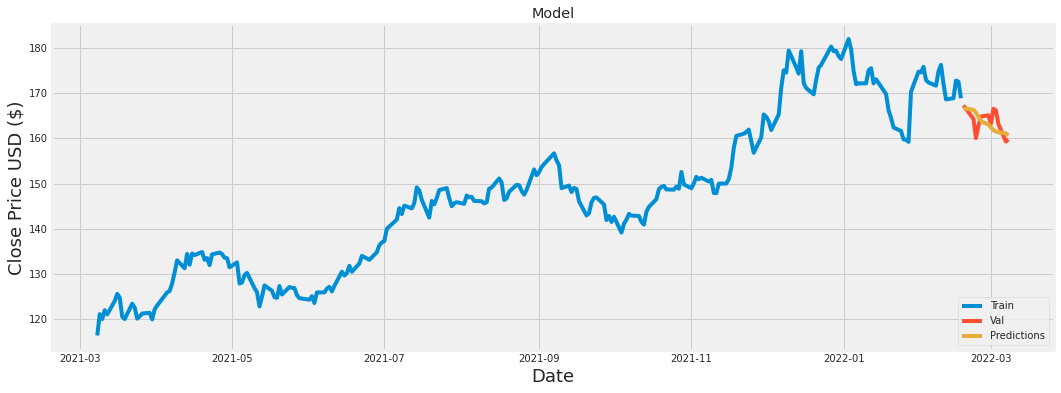

In [44]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [45]:
valid

,Close,Predictions
Date,,
2022-02-18,167.300003,166.677826
2022-02-22,164.320007,166.321548
2022-02-23,160.070007,165.720642
2022-02-24,162.740005,164.780518
2022-02-25,164.850006,163.829254
2022-02-28,165.119995,163.038345
2022-03-01,163.199997,162.414108
2022-03-02,166.559998,161.836548
2022-03-03,166.229996,161.506546
